In [84]:
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
data_path = "../data/cohort_tables_for_juan.xlsx"

number_of_customers_raw = pd.read_excel(
    data_path,
    "All cohorts -- combined",
    index_col=0,
    usecols="A:Q",
    skiprows=2,
    nrows=18,
)

number_of_customers_raw

,y2016_q1,y2016_q2,y2016_q3,y2016_q4,y2017_q1,y2017_q2,y2017_q3,y2017_q4,y2018_q1,y2018_q2,y2018_q3,y2018_q4,y2019_q1,y2019_q2,y2019_q3,y2019_q4
pre_y2016,2010.0,1908.0,1859.0,3062.0,1515.0,1692.0,1470.0,2501.0,1408.0,1549.0,1435.0,2391.0,1287.0,1375.0,1366.0,2241
y2016_q1,2944.0,355.0,326.0,481.0,299.0,277.0,236.0,372.0,262.0,251.0,248.0,382.0,221.0,216.0,218.0,341
y2016_q2,NaN,2969.0,433.0,519.0,273.0,329.0,272.0,379.0,245.0,286.0,257.0,371.0,205.0,243.0,215.0,321
y2016_q3,NaN,NaN,2842.0,549.0,243.0,297.0,305.0,370.0,212.0,261.0,251.0,348.0,188.0,233.0,241.0,315
y2016_q4,NaN,NaN,NaN,6162.0,620.0,550.0,458.0,953.0,438.0,431.0,409.0,838.0,361.0,375.0,337.0,762
y2017_q1,NaN,NaN,NaN,NaN,2459.0,269.0,211.0,331.0,216.0,173.0,175.0,292.0,178.0,172.0,160.0,265
y2017_q2,NaN,NaN,NaN,NaN,NaN,2236.0,280.0,320.0,181.0,217.0,197.0,276.0,166.0,181.0,169.0,241
y2017_q3,NaN,NaN,NaN,NaN,NaN,NaN,2143.0,389.0,218.0,222.0,239.0,282.0,160.0,184.0,202.0,254
y2017_q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5888.0,628.0,430.0,406.0,928.0,370.0,344.0,348.0,777
y2018_q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2693.0,292.0,253.0,387.0,245.0,229.0,204.0,339


In [62]:
total_spend_raw = pd.read_excel(
    data_path,
    "All cohorts -- combined",
    index_col=0,
    usecols="A:Q",
    skiprows=68,
    nrows=18,
)

total_spend_raw

,y2016_q1,y2016_q2,y2016_q3,y2016_q4,y2017_q1,y2017_q2,y2017_q3,y2017_q4,y2018_q1,y2018_q2,y2018_q3,y2018_q4,y2019_q1,y2019_q2,y2019_q3,y2019_q4
pre_y2016,146469.72,147472.24,122340.91,262104.03,113694.80,114756.79,97574.81,210861.60,95459.96,104314.94,90077.47,198903.35,97135.11,93293.45,88732.57,191090.54
y2016_q1,183054.91,26705.56,19814.07,41003.87,20687.20,18606.73,13196.78,30292.31,17879.51,15101.83,14645.92,28513.02,16074.13,15220.93,13931.42,25092.79
y2016_q2,NaN,173538.95,28257.96,44169.41,20847.86,21766.06,17495.31,29636.76,18373.08,18129.28,15259.08,30552.06,12818.48,15896.97,12256.13,22144.01
y2016_q3,NaN,NaN,169801.16,44607.95,17704.73,17696.39,19498.53,31182.84,12873.41,16901.40,15046.24,26502.08,11249.28,14747.00,14481.31,23655.59
y2016_q4,NaN,NaN,NaN,462570.46,46512.25,32395.31,28449.73,85700.87,29531.04,24698.80,22408.81,63535.72,25290.76,21524.64,20035.82,63588.12
y2017_q1,NaN,NaN,NaN,NaN,167251.29,16951.59,13121.43,26874.17,14975.41,11088.31,9605.31,25119.04,10957.68,11266.06,8627.77,20766.34
y2017_q2,NaN,NaN,NaN,NaN,NaN,133107.46,15825.43,23227.19,12293.93,13046.55,13820.91,18743.83,11698.33,12678.44,11880.58,16908.91
y2017_q3,NaN,NaN,NaN,NaN,NaN,NaN,128553.35,27355.14,14951.89,12157.69,15006.42,20302.66,11401.45,10490.93,11331.99,17979.52
y2017_q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412403.83,40881.56,24377.49,23002.82,72807.97,25975.14,20362.67,20105.69,61710.57
y2018_q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162871.13,18487.83,14952.24,28817.37,13959.85,13998.13,11282.79,27512.44


In [78]:
number_of_customers_wide = (
    number_of_customers_raw.reset_index(drop=False)
    .rename(columns={"index": "cohort"})
    .query("cohort != 'pre_y2016'")
)


def _clean_cohort_name(cohort_name: pd.Series) -> pd.Series:
    cohort_name_clean = (
        cohort_name.str.replace("y", "").str.replace("_", "-").str.replace("q", "Q")
    )
    return pd.PeriodIndex(cohort_name_clean, freq="Q").to_timestamp()


number_of_customers_long = (
    number_of_customers_wide.melt(
        id_vars="cohort", var_name="period", value_name="n_active_users"
    )
    .query("n_active_users.notna()")
    .sort_values(by=["cohort", "period"])
    .assign(
        cohort_date=lambda df: _clean_cohort_name(df["cohort"]),
        period_date=lambda df: _clean_cohort_name(df["period"]),
        n_users=lambda df: df.groupby("cohort")["n_active_users"].transform("max"),
    )
    .assign(
        cohort_age=lambda df: (df["period_date"] - df["cohort_date"]).dt.days,
        retention=lambda df: df["n_active_users"] / df["n_users"],
    )
)

number_of_customers_long.head()

,cohort,period,n_active_users,cohort_date,period_date,n_users,cohort_age,retention
0,y2016_q1,y2016_q1,2944.0,2016-01-01,2016-01-01,2944.0,0,1.000000
16,y2016_q1,y2016_q2,355.0,2016-01-01,2016-04-01,2944.0,91,0.120584
32,y2016_q1,y2016_q3,326.0,2016-01-01,2016-07-01,2944.0,182,0.110734
48,y2016_q1,y2016_q4,481.0,2016-01-01,2016-10-01,2944.0,274,0.163383
64,y2016_q1,y2017_q1,299.0,2016-01-01,2017-01-01,2944.0,366,0.101562


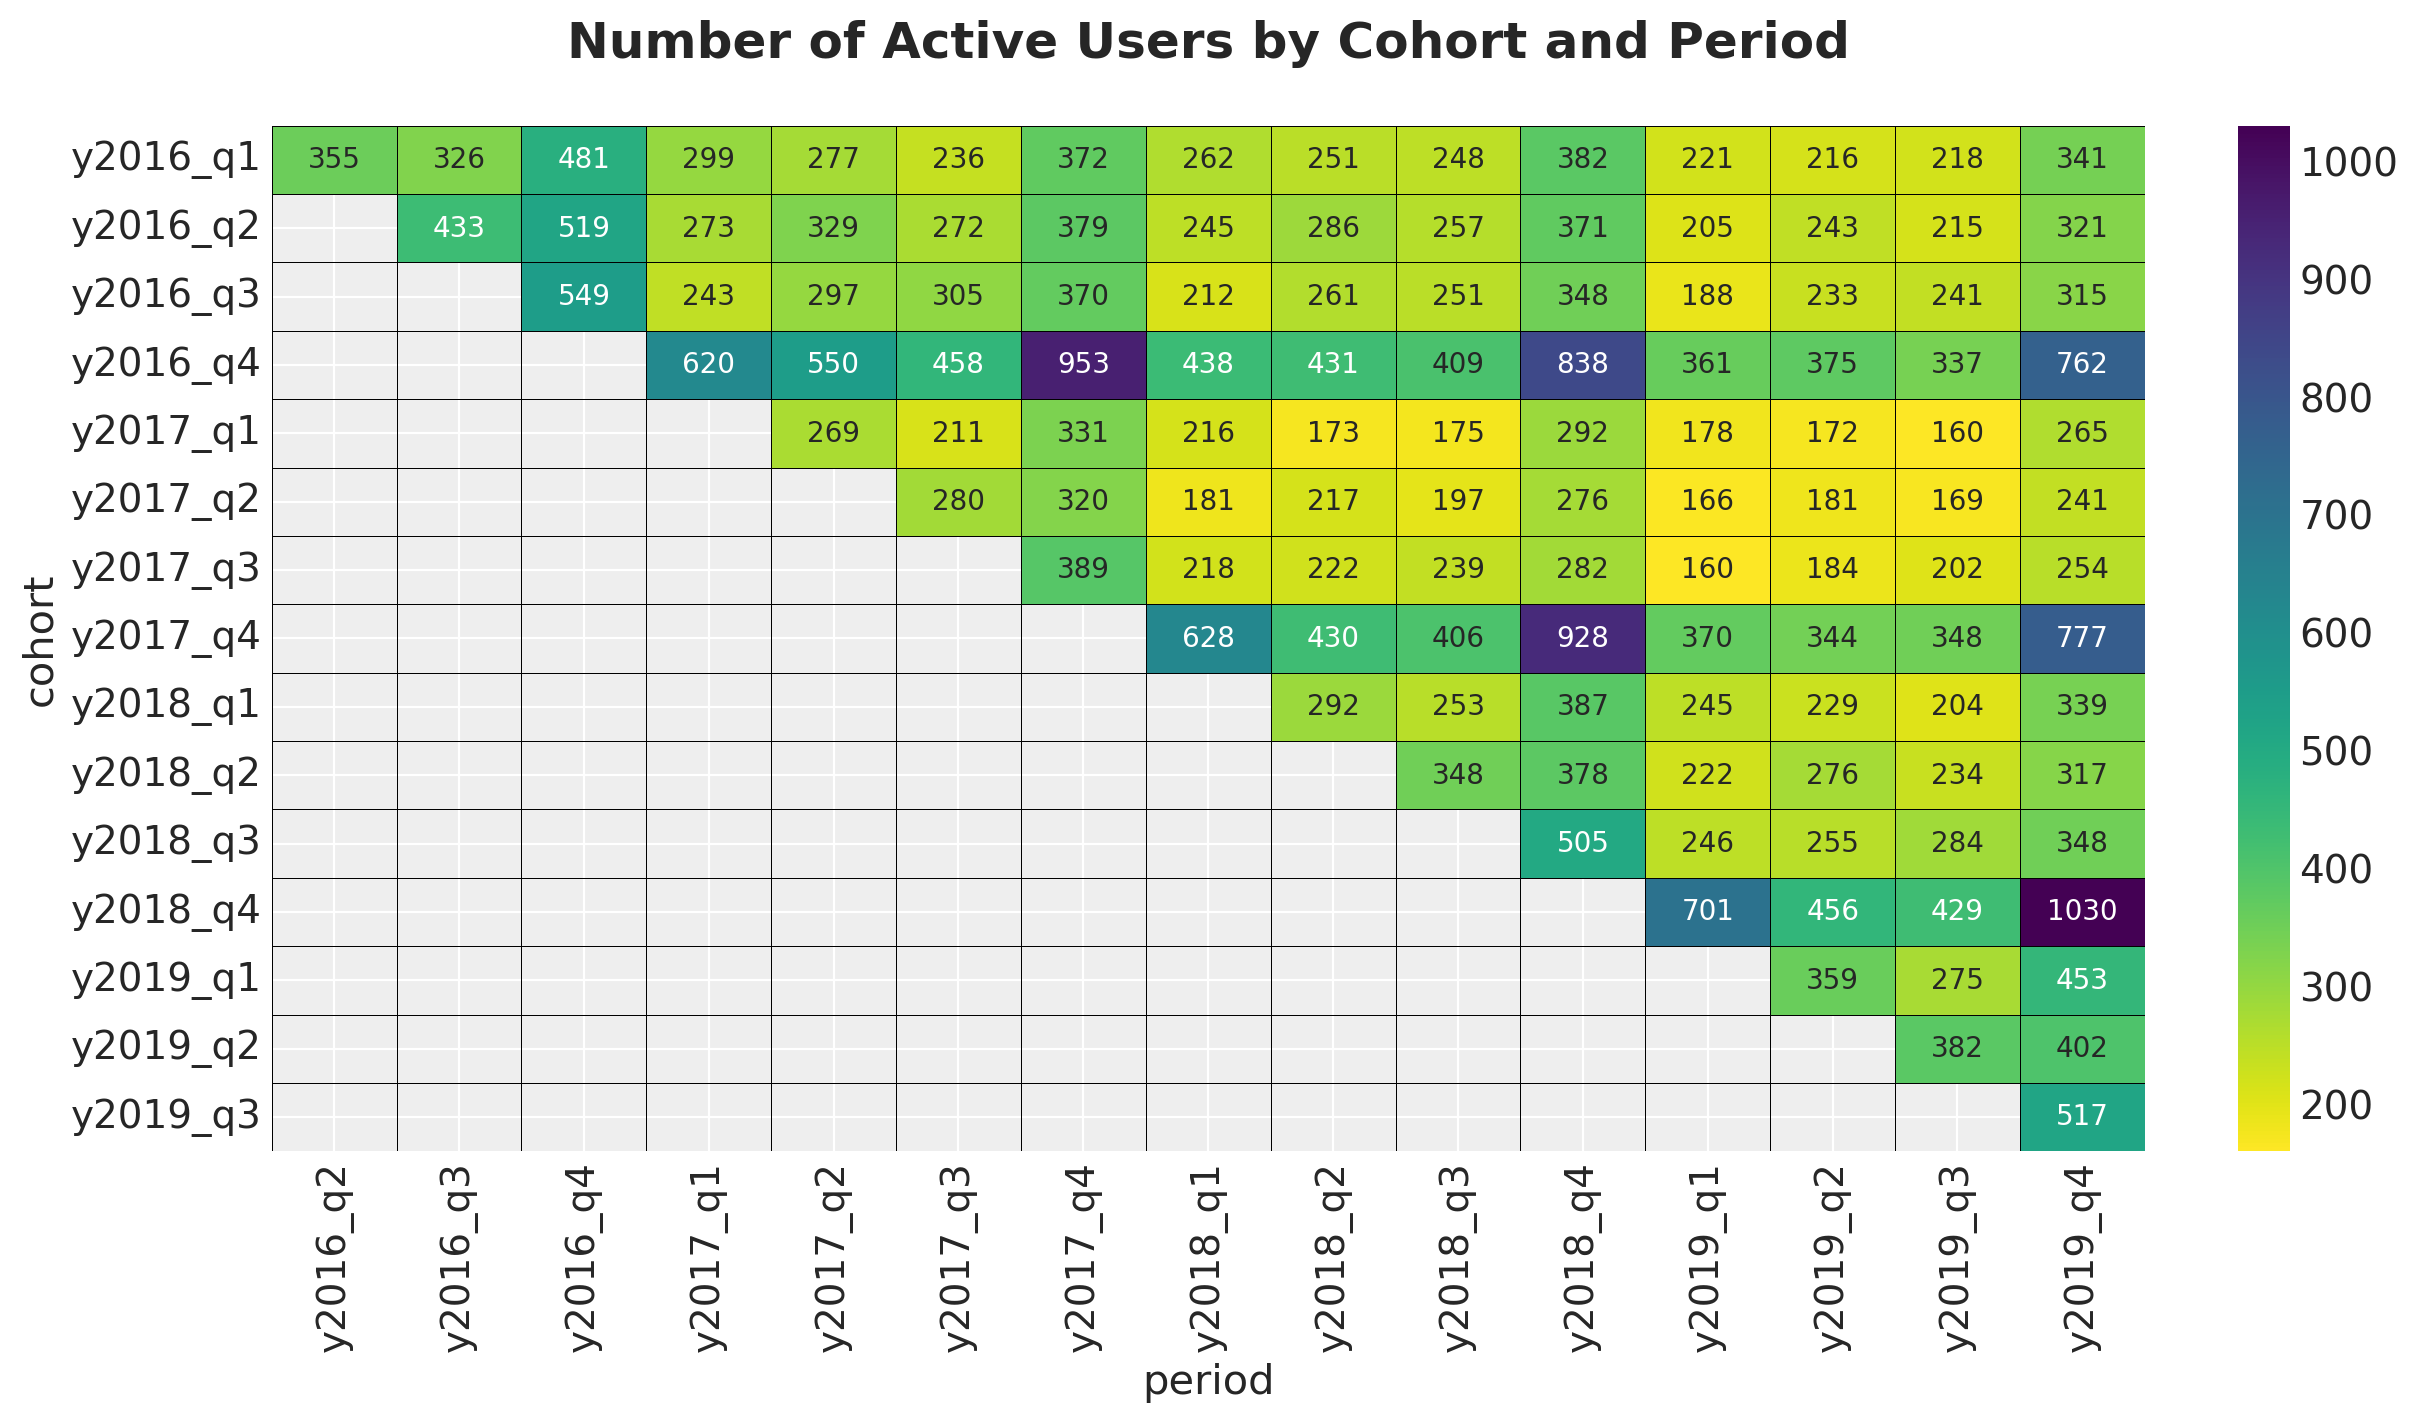

In [80]:
fig, ax = plt.subplots(figsize=(12, 7))

(
    number_of_customers_long.query("cohort_age != 0")
    .filter(["cohort", "period", "n_active_users"])
    .pivot_table(index="cohort", columns="period", values="n_active_users")
    .pipe(
        (sns.heatmap, "data"),
        cmap="viridis_r",
        linewidths=0.2,
        linecolor="black",
        annot=True,
        fmt="0.0f",
        ax=ax,
    )
)

ax.set_title(
    "Number of Active Users by Cohort and Period",
    fontsize=18,
    fontweight="bold",
    y=1.05,
);

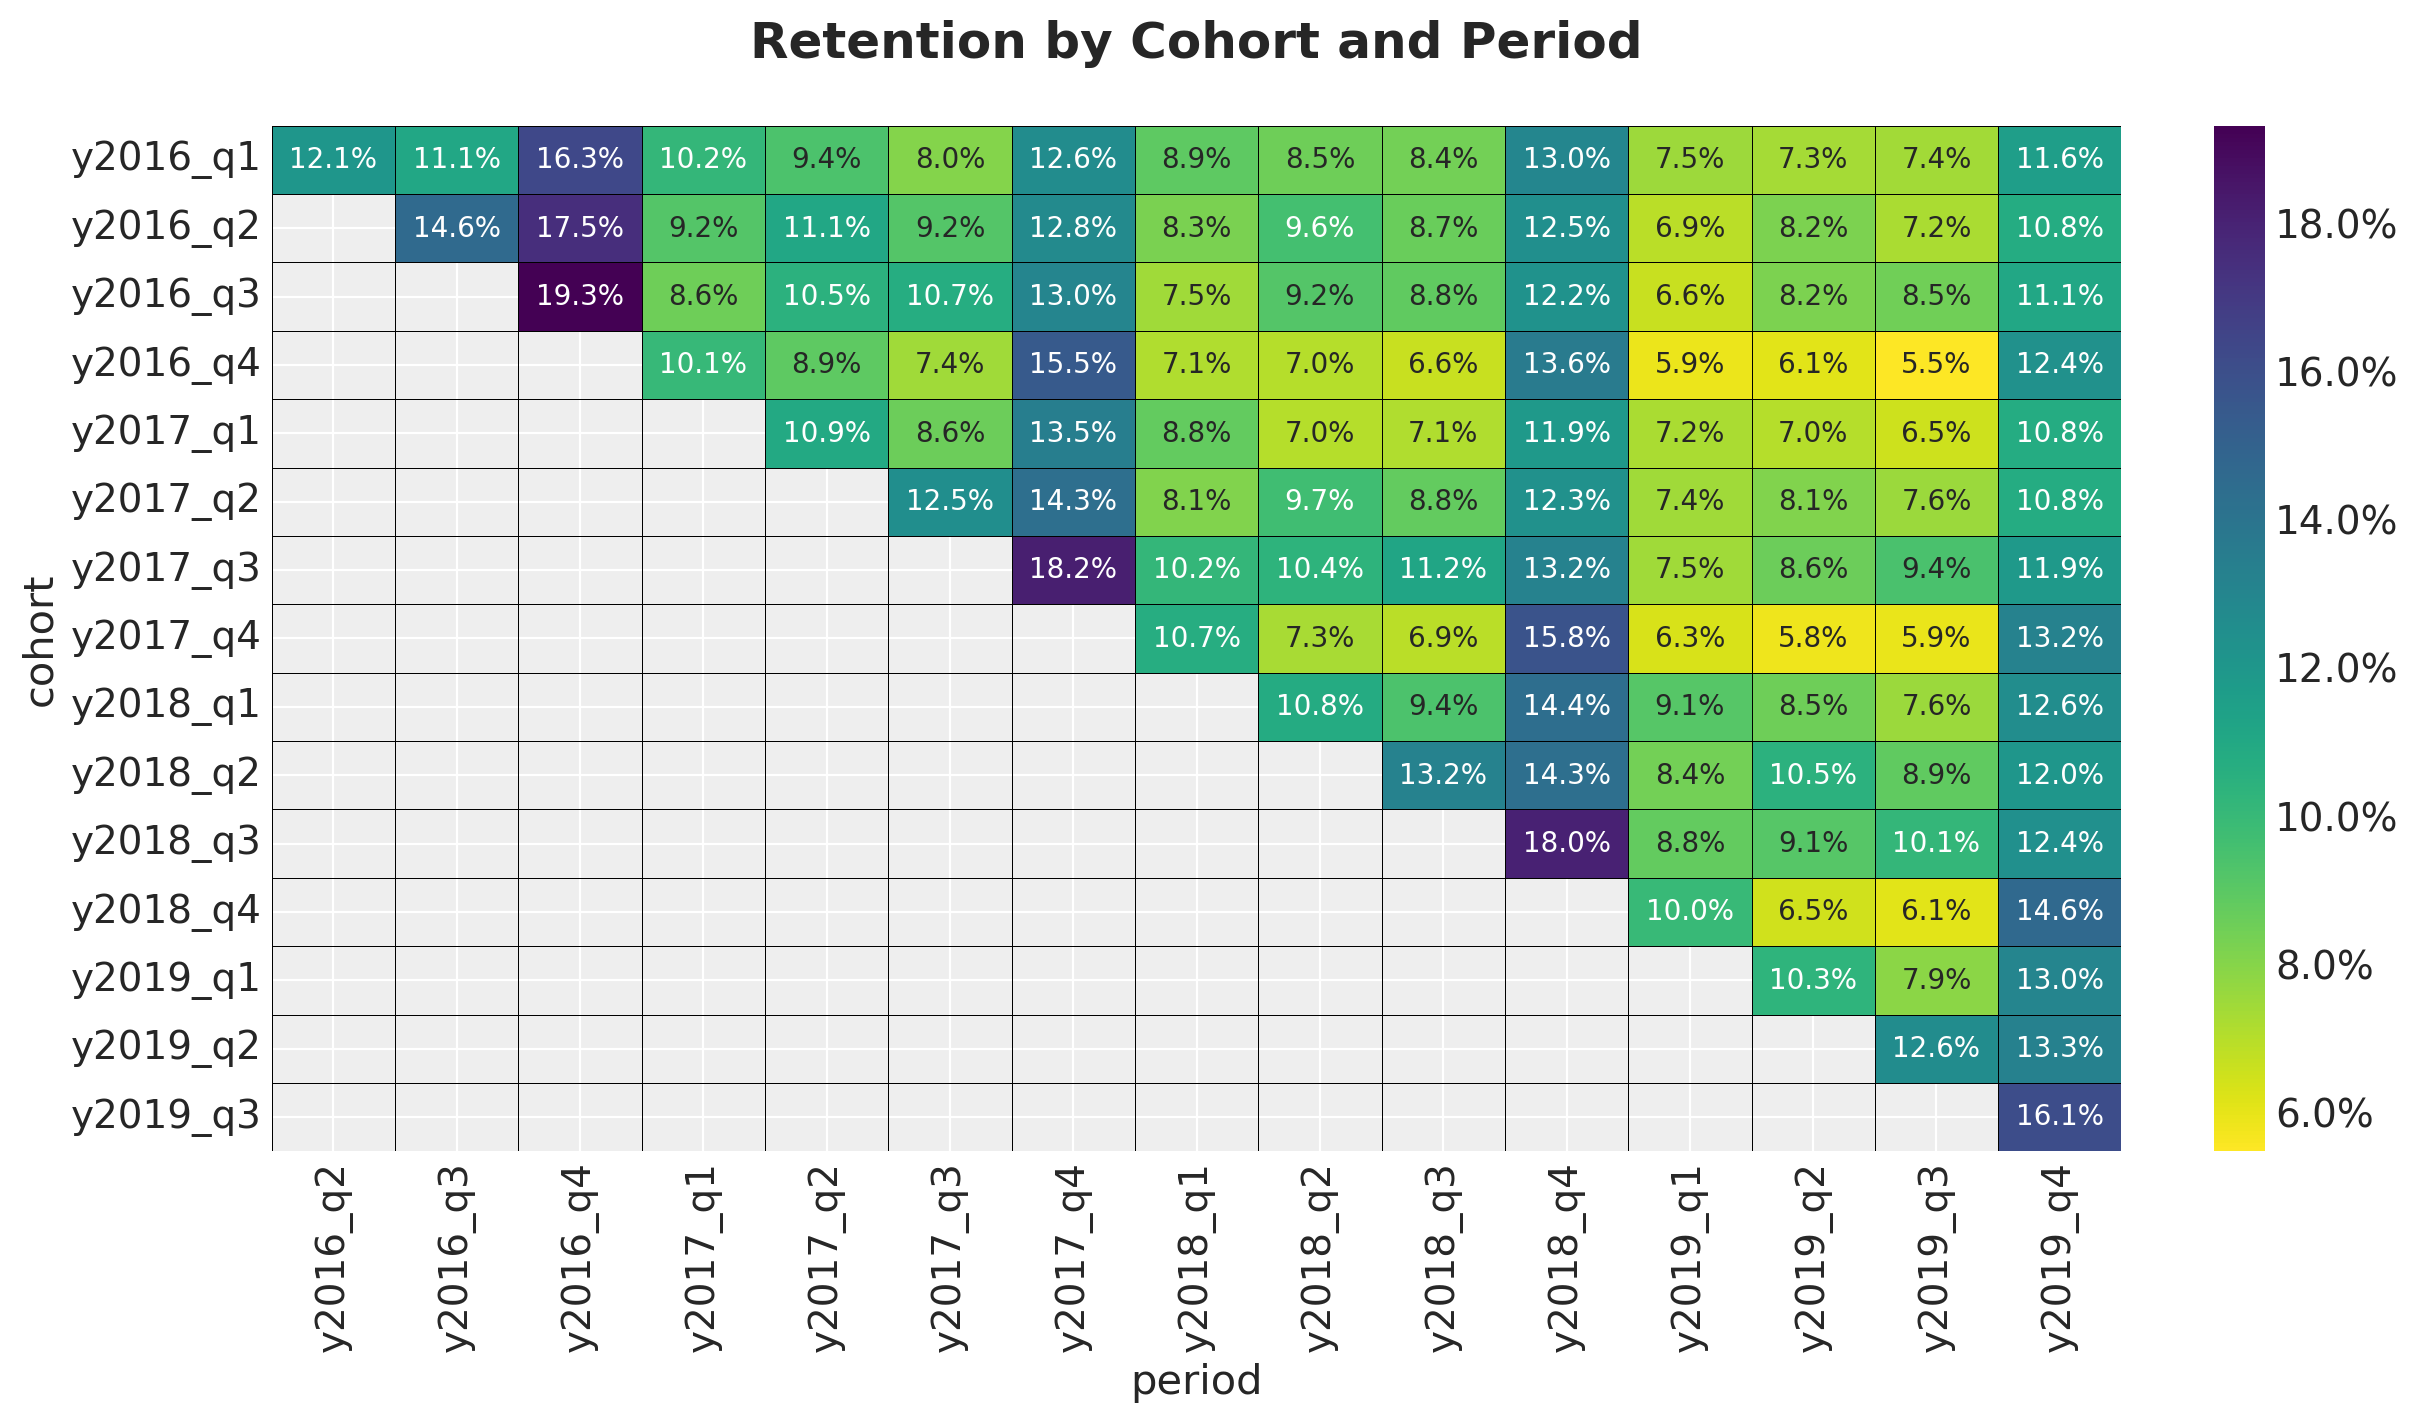

In [85]:
fig, ax = plt.subplots(figsize=(12, 7))

(
    number_of_customers_long.query("cohort_age != 0")
    .filter(["cohort", "period", "retention"])
    .pivot_table(index="cohort", columns="period", values="retention")
    .pipe(
        (sns.heatmap, "data"),
        cmap="viridis_r",
        linewidths=0.2,
        linecolor="black",
        annot=True,
        fmt="0.1%",
        cbar_kws={"format": mtick.PercentFormatter(1)},
        ax=ax,
    )
)

ax.set_title(
    "Retention by Cohort and Period",
    fontsize=18,
    fontweight="bold",
    y=1.05,
);